In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing data

movies_url = "https://raw.githubusercontent.com/nishilp/Datascience03/master/data/movies.csv"
ratings_url = "https://raw.githubusercontent.com/nishilp/Datascience03/master/data/ratings.csv"
tags_url = "https://raw.githubusercontent.com/nishilp/Datascience03/master/data/tags.csv"

In [3]:
# Loading the data into pandas dataframes

movies_data = pd.read_csv(movies_url)
ratings_data = pd.read_csv(ratings_url)
tags_data = pd.read_csv(tags_url)

In [4]:
# Dropping timestamp columns

ratings_data = ratings_data.drop(columns = ['timestamp'])

In [5]:
tags_data = tags_data.drop(columns = ['timestamp'])

In [6]:
data = pd.merge(ratings_data, tags_data)

In [7]:
data.head(5)

,userId,movieId,rating,tag
0,2,60756,5.0,funny
1,2,60756,5.0,Highly quotable
2,2,60756,5.0,will ferrell
3,2,89774,5.0,Boxing story
4,2,89774,5.0,MMA


In [8]:
data = pd.merge(data, movies_data)

In [9]:
data.head()

,userId,movieId,rating,tag,title,genres
0,2,60756,5.0,funny,Step Brothers (2008),Comedy
1,2,60756,5.0,Highly quotable,Step Brothers (2008),Comedy
2,2,60756,5.0,will ferrell,Step Brothers (2008),Comedy
3,62,60756,3.5,comedy,Step Brothers (2008),Comedy
4,62,60756,3.5,funny,Step Brothers (2008),Comedy


In [10]:
# Getting the average rating for each movie

avg_rate = pd.merge(ratings_data, movies_data, on = ['movieId'])
avg_rate.head(10)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [11]:
avg_rate = avg_rate.drop(columns = ['title','userId'])
avg_rate.head(5)

,movieId,rating,genres
0,1,4.0,Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1,4.5,Adventure|Animation|Children|Comedy|Fantasy
3,1,2.5,Adventure|Animation|Children|Comedy|Fantasy
4,1,4.5,Adventure|Animation|Children|Comedy|Fantasy


In [12]:
avg_rate = avg_rate.groupby(['movieId','genres'], as_index = False).mean()
avg_rate.head(5)

,movieId,genres,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Adventure|Children|Fantasy,3.431818
2,3,Comedy|Romance,3.259615
3,4,Comedy|Drama|Romance,2.357143
4,5,Comedy,3.071429


In [13]:
# We need to convert categorical features to numerical ones
# Using LabelEncoder on our 'genres' feature

from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
avg_rate['genres'] = number.fit_transform(avg_rate['genres'].astype('str'))
avg_rate.head(5)

,movieId,genres,rating
0,1,351,3.920930
1,2,417,3.431818
2,3,732,3.259615
3,4,687,2.357143
4,5,634,3.071429


In [14]:
vals = avg_rate.iloc[:,[1,2]].values

Computing WCSS reference Reference : https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis

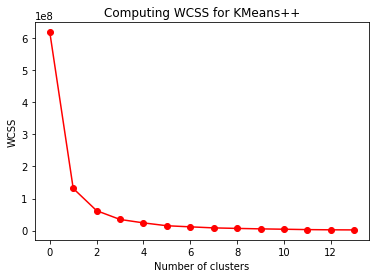

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 15 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

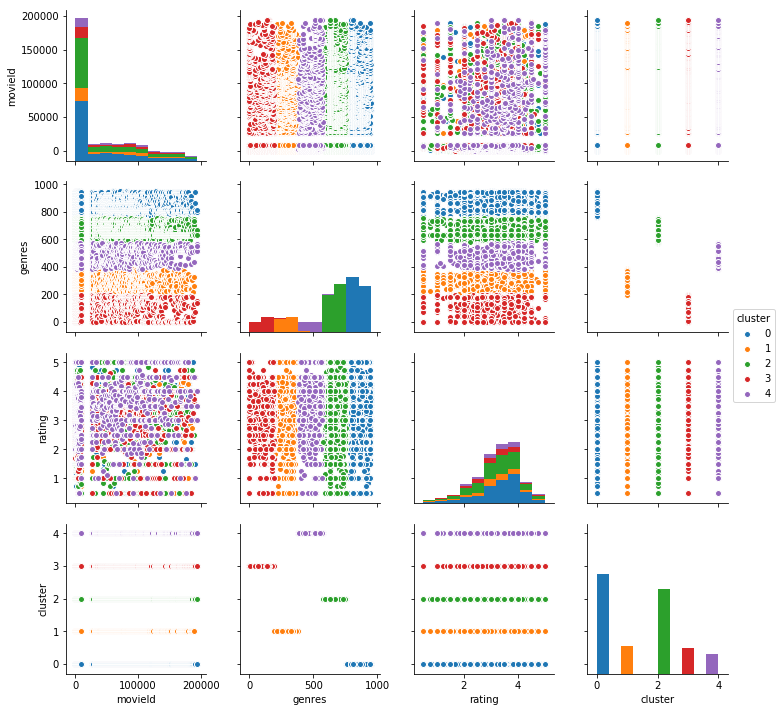

In [18]:
# Selecting K  = 5 for K- means clustering algrithm
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )

# As it's difficult to visualise clusters when the data is high-dimensional - we'll see
# if Seaborn's pairplot can help us see how the clusters are separating out the samples.   
import seaborn as sns
avg_rate['cluster'] = y_pred
cols = list(avg_rate.columns)
#cols.remove('movieId')
sns.pairplot( avg_rate[ cols ], hue="cluster")